Para extrair dados de uma planilha XLSX e criar estatísticas juntamente com gráficos de desempenho usando Python, você pode seguir os passos abaixo. Antes de começar, é necessário ter o Python e as bibliotecas pandas, seaborn e matplotlib instaladas. Se você não possui essas bibliotecas, pode instalá-las usando o pip:

In [1]:
pip install pandas seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


Aqui está um tutorial passo a passo:

Passo 1: Carregar a Planilha
Primeiro, carregue a planilha de dados utilizando o Pandas:

In [2]:
import pandas as pd

# Carregar a planilha
caminho_arquivo = 'Class_brasileirão2023.xlsx'
dados_campeonato = pd.read_excel(caminho_arquivo)


Passo 2: Explorar e Visualizar os Dados
Dê uma olhada nos primeiros dados para entender sua estrutura:

In [4]:
print(dados_campeonato.head())


                                             Posicao  Pontos  jogos  vitoria  \
0                1º  0 Palmeiras - SP Palmeiras - SP      62     34       18   
1                  2º  0 Botafogo - RJ Botafogo - RJ      61     34       18   
2                  3º  0 Flamengo - RJ Flamengo - RJ      60     34       17   
3                      4º  0 Grêmio - RS Grêmio - RS      59     34       18   
4  5º  0 Red Bull Bragantino - SP Red Bull Bragan...      59     34       16   

   Empate  Derrota  Gols Pro  Gols Contra  Saldo de Gols  Cartoes amarelos  \
0       8        8        56           30             26                94   
1       7        9        55           32             23                87   
2       9        8        51           37             14                77   
3       5       11        57           50              7                87   
4      11        7        46           30             16                99   

   Cartoes Vermelhos  Aproveitamento  
0          

In [5]:
print(dados_campeonato.head())


                                             Posicao  Pontos  jogos  vitoria  \
0                1º  0 Palmeiras - SP Palmeiras - SP      62     34       18   
1                  2º  0 Botafogo - RJ Botafogo - RJ      61     34       18   
2                  3º  0 Flamengo - RJ Flamengo - RJ      60     34       17   
3                      4º  0 Grêmio - RS Grêmio - RS      59     34       18   
4  5º  0 Red Bull Bragantino - SP Red Bull Bragan...      59     34       16   

   Empate  Derrota  Gols Pro  Gols Contra  Saldo de Gols  Cartoes amarelos  \
0       8        8        56           30             26                94   
1       7        9        55           32             23                87   
2       9        8        51           37             14                77   
3       5       11        57           50              7                87   
4      11        7        46           30             16                99   

   Cartoes Vermelhos  Aproveitamento  
0          

Passo 3: Análise Estatística Descritiva
Calcule estatísticas descritivas dos dados:

In [6]:
estatisticas = dados_campeonato.describe()
print(estatisticas)


          Pontos      jogos    vitoria     Empate   Derrota   Gols Pro  \
count  20.000000  20.000000  20.000000  20.000000  20.00000  20.000000   
mean   46.650000  34.100000  12.550000   9.000000  12.55000  42.500000   
std    11.032369   0.307794   3.790223   2.176429   3.88621   7.416198   
min    21.000000  34.000000   4.000000   5.000000   7.00000  32.000000   
25%    41.000000  34.000000  10.750000   8.000000   9.00000  37.000000   
50%    45.000000  34.000000  12.000000   9.000000  12.50000  39.500000   
75%    57.500000  34.000000  16.000000  10.250000  14.25000  46.250000   
max    62.000000  35.000000  18.000000  14.000000  21.00000  57.000000   

       Gols Contra  Saldo de Gols  Cartoes amarelos  Cartoes Vermelhos  \
count    20.000000      20.000000         20.000000          20.000000   
mean     42.500000       0.000000         86.750000           5.750000   
std      11.861037      15.420424         23.619517           2.788605   
min      27.000000     -32.000000    

Passo 4: Criar um Mapa de Calor (Heatmap)
Use a biblioteca seaborn para criar um heatmap:


C:\Users\ppeli\AppData\Local\Temp\ipykernel_12828\4006563439.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_interesse.corr()


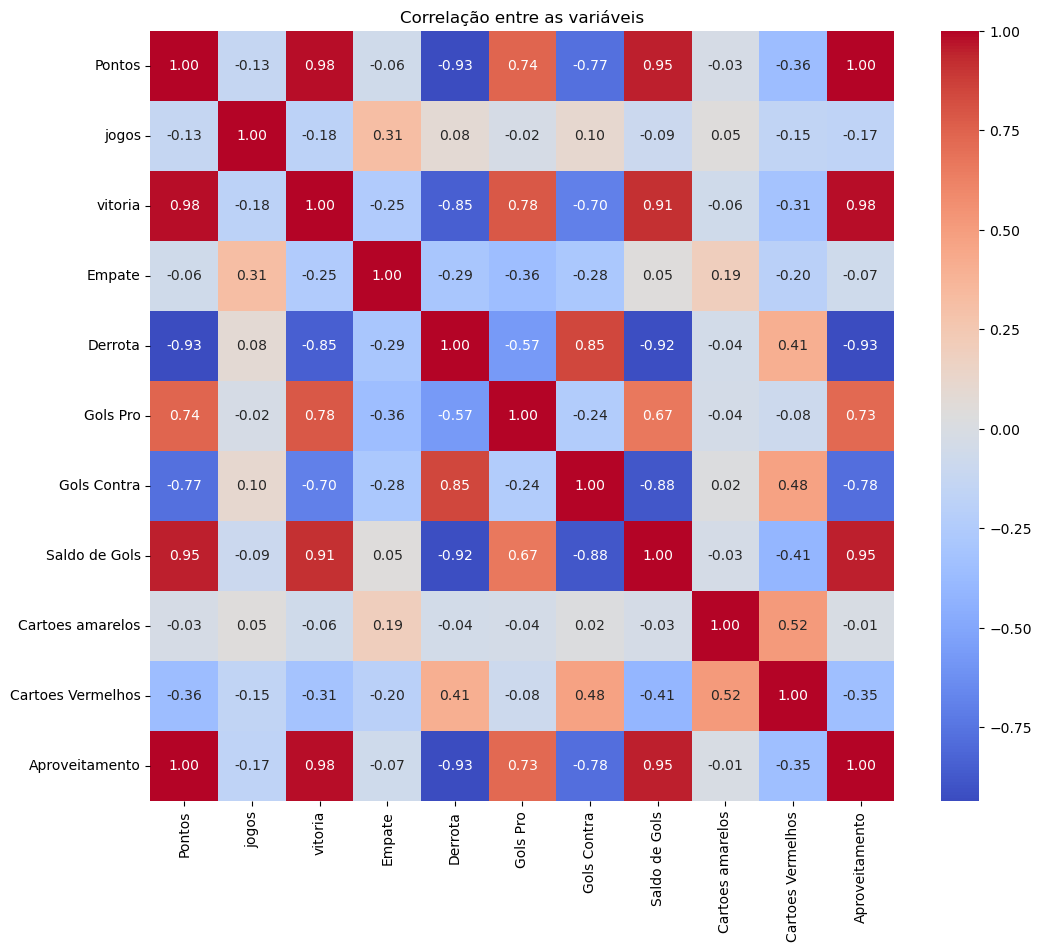

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecione as colunas de interesse para o heatmap
dados_interesse = dados_campeonato[['Posicao', 'Pontos', 'jogos', 'vitoria', 'Empate', 'Derrota',
                                   'Gols Pro', 'Gols Contra', 'Saldo de Gols', 'Cartoes amarelos',
                                   'Cartoes Vermelhos', 'Aproveitamento']]

# Calcular a matriz de correlação
correlacao = dados_interesse.corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre as variáveis')
plt.show()


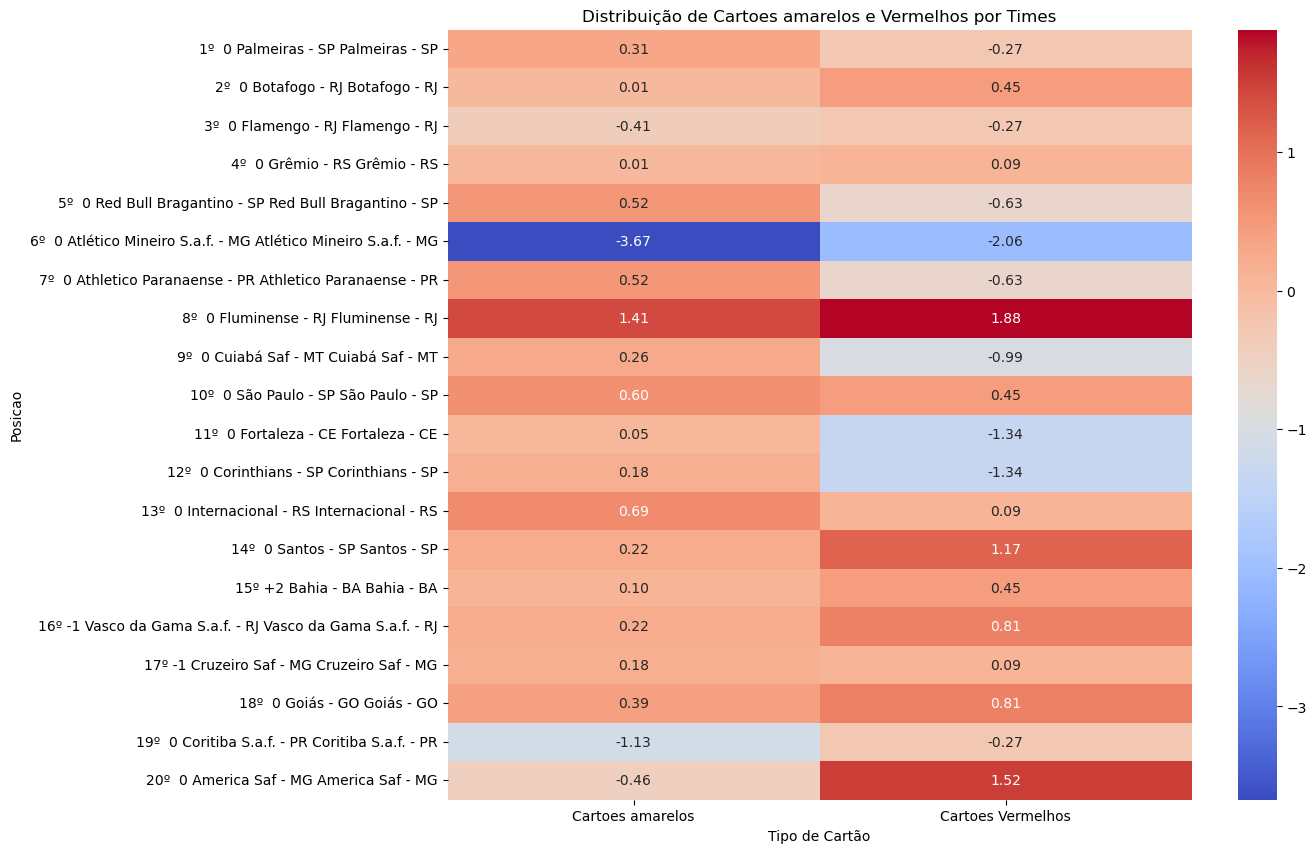

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a planilha
caminho_arquivo = 'Class_brasileirão2023.xlsx'
dados_campeonato = pd.read_excel(caminho_arquivo)

# Selecionar as colunas de interesse
dados_times_cartoes = dados_campeonato[['Posicao', 'Cartoes amarelos', 'Cartoes Vermelhos']]

# Configurar os times como índice para facilitar a criação do heatmap
dados_times_cartoes = dados_times_cartoes.set_index('Posicao')

# Normalização dos dados para comparação visual no mapa de calor
normalized = (dados_times_cartoes - dados_times_cartoes.mean()) / dados_times_cartoes.std()

# Criar o mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(normalized, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Distribuição de Cartoes amarelos e Vermelhos por Times')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Posicao')
plt.show()


In [9]:
import pandas as pd

# Carregar a planilha
caminho_arquivo = 'Class_brasileirão2023.xlsx'
dados_campeonato = pd.read_excel(caminho_arquivo)

# Verificar as primeiras linhas para entender a estrutura dos dados
print(dados_campeonato.head())

# Listar as colunas disponíveis no DataFrame
print(dados_campeonato.columns)


                                             Posicao  Pontos  jogos  vitoria  \
0                1º  0 Palmeiras - SP Palmeiras - SP      62     34       18   
1                  2º  0 Botafogo - RJ Botafogo - RJ      61     34       18   
2                  3º  0 Flamengo - RJ Flamengo - RJ      60     34       17   
3                      4º  0 Grêmio - RS Grêmio - RS      59     34       18   
4  5º  0 Red Bull Bragantino - SP Red Bull Bragan...      59     34       16   

   Empate  Derrota  Gols Pro  Gols Contra  Saldo de Gols  Cartoes amarelos  \
0       8        8        56           30             26                94   
1       7        9        55           32             23                87   
2       9        8        51           37             14                77   
3       5       11        57           50              7                87   
4      11        7        46           30             16                99   

   Cartoes Vermelhos  Aproveitamento  
0          

In [16]:
import pandas as pd

# Carregar a planilha
caminho_arquivo = 'Class_brasileirão2023.xlsx'
dados_campeonato = pd.read_excel(caminho_arquivo)

# Selecionar as colunas de interesse
dados_times_cartoes = dados_campeonato[['Posicao', 'Cartoes amarelos', 'Cartoes Vermelhos']]

# Somar os cartões amarelos e vermelhos para cada time
dados_times_cartoes['Total_Cartoes'] = dados_times_cartoes['Cartoes amarelos'] + dados_times_cartoes['Cartoes Vermelhos']

# Ordenar os times pelo total de cartões (do mais disciplinado ao menos disciplinado)
times_disciplinados = dados_times_cartoes.sort_values('Total_Cartoes')

# Exibir o ranking dos times mais disciplinados
print(times_disciplinados[['Posicao', 'Total_Cartoes']])


                                              Posicao  Total_Cartoes
5   6º  0 Atlético Mineiro S.a.f. - MG Atlético Mi...              0
18   19º  0 Coritiba S.a.f. - PR Coritiba S.a.f. - PR             65
2                   3º  0 Flamengo - RJ Flamengo - RJ             82
19           20º  0 America Saf - MG America Saf - MG             86
10               11º  0 Fortaleza - CE Fortaleza - CE             90
3                       4º  0 Grêmio - RS Grêmio - RS             93
11           12º  0 Corinthians - SP Corinthians - SP             93
1                   2º  0 Botafogo - RJ Botafogo - RJ             94
14                       15º +2 Bahia - BA Bahia - BA             96
8               9º  0 Cuiabá Saf - MT Cuiabá Saf - MT             96
16         17º -1 Cruzeiro Saf - MG Cruzeiro Saf - MG             97
0                 1º  0 Palmeiras - SP Palmeiras - SP             99
15  16º -1 Vasco da Gama S.a.f. - RJ Vasco da Gama...            100
13                     14º  0 Sant

C:\Users\ppeli\AppData\Local\Temp\ipykernel_12828\136078128.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_times_cartoes['Total_Cartoes'] = dados_times_cartoes['Cartoes amarelos'] + dados_times_cartoes['Cartoes Vermelhos']


In [28]:
import pandas as pd

# Carregar a planilha
caminho_arquivo = 'Class_brasileirão2023.xlsx'
dados_campeonato = pd.read_excel(caminho_arquivo)

# Verificar as colunas presentes no DataFrame
print(dados_campeonato.columns)


Index(['Posicao', 'Pontos', 'jogos', 'vitoria', 'Empate', 'Derrota',
       'Gols Pro', 'Gols Contra', 'Saldo de Gols', 'Cartoes amarelos',
       'Cartoes Vermelhos', 'Aproveitamento'],
      dtype='object')
